In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [2]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        
        self.weights = np.random.randn(3) * 1e-4 ## small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training : \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
        
    
    def _z_outcome(self, inputs, weights):
        
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        
        return np.where(z > 0, 1, 0)
    
    def fit(self, x, y):
        
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias : \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print(f"for epoch >> {epoch}")
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            
            print(f"predicted value after forward pass : \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights adter epochs : {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
    
    def predict(self, X):
        
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        
        total_loss = np.sum(self.error)
        print(f"\ntotal loss : {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
        
    
    def load(self, filepath):
        return joblib.load(filepath)
        

In [3]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    
    y = df[target_col]
    
    return X,y

In [4]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
 }

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X, y = prepare_data(df_AND)

ETA = 0.1 # learning rate between 0 and 1

EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X,y)
_ = model_and.total_loss() # - dummyvariabe wearn't going to use it

initial weights before training : 
[1.04832097e-04 1.78331970e-04 1.36678978e-05]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass : 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights adter epochs : 1/10: 
[-0.09989517 -0.09982167  0.20001367]
####################
for epoch >> 1
predicted value after forward pass : 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights adter epochs : 2/10: 
[0.00010483 0.00017833 0.10001367]
####################
for epoch >> 2
predicted value after forward pass : 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights adter epochs : 3/10: 
[1.00104832e-01 1.00178332e-01 1.36678978e-05]
####################
for epoch >> 3
predicted value after forward pass : 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights adter epochs : 4/10: 
[1.04832097e-04 1.78331

In [6]:
model_and.save(filename="and.model")

In [7]:
reload_and_model = Perceptron().load(filepath="model/and.model")

In [8]:
reload_and_model.predict(X=[[1,0]])

array([0])

In [9]:
reload_and_model.predict(X=[[0,0]])

array([0])

In [10]:
reload_and_model.predict(X=[[0,1]])

array([0])

In [11]:
reload_and_model.predict(X=[[1,1]])

array([1])

In [12]:
## OR gate

OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
 }

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [13]:
X, y = prepare_data(df_OR)

ETA = 0.1 # learning rate between 0 and 1

EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X,y)
_ = model_OR.total_loss()

initial weights before training : 
[ 1.29775587e-04 -1.28353404e-04  1.66637577e-05]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass : 
[0 0 1 0]
error: 
0    0
1    1
2    0
3    1
Name: y, dtype: int64
updated weights adter epochs : 1/10: 
[ 0.10012978  0.19987165 -0.19998334]
####################
for epoch >> 1
predicted value after forward pass : 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights adter epochs : 2/10: 
[ 0.10012978  0.19987165 -0.09998334]
####################
for epoch >> 2
predicted value after forward pass : 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights adter epochs : 3/10: 
[1.00129776e-01 1.99871647e-01 1.66637577e-05]
####################
for epoch >> 3
predicted value after forward pass : 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights adter epochs : 4/10: 
[1.00129776e-01 1

In [14]:
model_OR.save(filename="or.model", model_dir="model_or")

In [15]:
reload_or_model = Perceptron().load(filepath="model_or/or.model")

In [16]:
reload_or_model.predict(X=[[1,0]])

array([1])

In [17]:
reload_or_model.predict(X=[[1,1]])

array([1])

In [18]:
reload_or_model.predict(X=[[0,0]])

array([0])

In [19]:
## XOR gate

XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
 }

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [20]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # learning rate between 0 and 1

EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X,y)
_ = model_xor.total_loss()

initial weights before training : 
[ 2.81226127e-05 -3.56598563e-05  7.30835826e-05]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass : 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights adter epochs : 1/10: 
[ 0.10002812  0.09996434 -0.19992692]
####################
for epoch >> 1
predicted value after forward pass : 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights adter epochs : 2/10: 
[ 2.81226127e-05 -3.56598563e-05  7.30835826e-05]
####################
for epoch >> 2
predicted value after forward pass : 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights adter epochs : 3/10: 
[ 0.10002812  0.09996434 -0.19992692]
####################
for epoch >> 3
predicted value after forward pass : 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights adter epochs : 4/10: 
[ 2.81226127e-

In [28]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

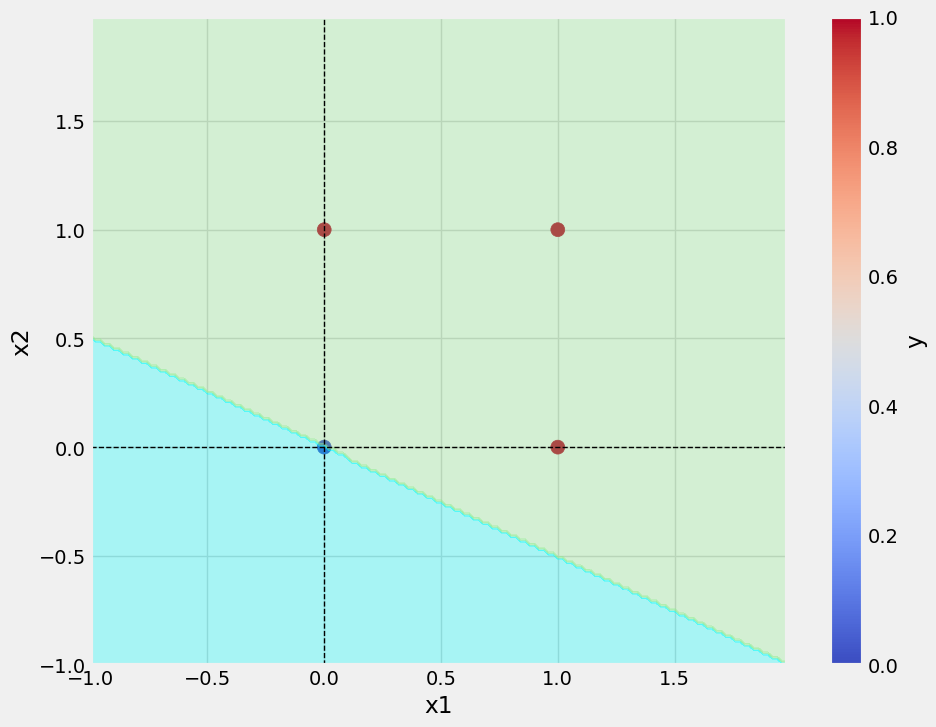

In [30]:
save_plot(df_OR, model_OR, filename="orplot.png")